Plotting the theoretical heatmaps in the right range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm

In [2]:
sns.set_context("notebook", font_scale=1.25)

### Model

$$ v + R \;\; {\rightleftharpoons} \;\;  R_{active} \;\; \rightarrow \;\; R_{active} = kvR $$

$$ R_{active} = kvR  \;\; \rightarrow \;\; R_{active} = kv(R_{total} - R_{active})$$

$$ R_{active} = \frac{kvR_{total}}{1+ kv} $$

$$ R_{active} = \frac{vR_{total}}{\frac{1}{k} + v}; \;\; \gamma = \frac{1}{k} $$

$$ R_{active} = \frac{vR_{total}}{\gamma + v}$$

$$I = \frac{\alpha R_{active}^n}{K^n+R_{active}^n}$$

### 1 CHX condition

In [3]:
def IRF3_percentage(v,R_tot, gamma, K, theta):
    
    """Function that computes the amount of active RIG-I, IFN expression and percentage of IFN
       in the population based on an initial distribution of virus and total RIG-I protein 
       and the corresponding paramters."""
    
    # Calculating amount of active RIG-I
    V, R_TOT = np.meshgrid(v, R_tot)
    n = 1
    alpha =  100
    beta = 600
    gamma = 100
    K_v = 800
    first = ((R_TOT)*V)/(gamma+V)
    second = (((R_TOT-K_v)>0))*(V/(1+V)) + (V)#+V#+1
    R_active = first + second#((R_TOT)*V)/(gamma+V) * () #((1*V)/(gamma+V))*(1/(beta+R_tot**2)) #    
    
    # Plotting active RIG-I
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, R_active, cmap="RdPu")
    #ax.clabel(CS, inline=1, fontsize=10)
    #levels = np.arange(-1.0,1000,50)
    ax.contour(CS, colors='black')

    ax.set_title('Active RIG-I')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating IFN 
    alpha = 1
    n = 5
    I = (alpha*(R_active**n))/(K**n+R_active**n)
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating % of cells expressing IFN
    fraction_of_cells = []
    for i in range(len(R_tot)):
        cells = I[i] 
        count = 0
        for element in cells:
            if element >= theta: #0.04:#0.02:
                count +=1
        #print("count",i,count, R_tot[i])
        fraction_of_cells.append((count/len(R_tot))*100)
    
    # Plotting the percentage of cells expressing IFN
    plt.figure(figsize = (7,5))
    plt.scatter(list(R_tot),fraction_of_cells)
    plt.xlabel("RIG-I protein")
    plt.ylabel("% of cells with IRF3 in the nuclei")
    plt.show()

In [9]:
def IRF3_percentage_test(v,R_tot, gamma, K, theta):
    
    """Function that computes the amount of active RIG-I, IFN expression and percentage of IFN
       in the population based on an initial distribution of virus and total RIG-I protein 
       and the corresponding paramters."""
    
    # Calculating amount of active RIG-I
    V, R_TOT = np.meshgrid(v, R_tot)
    n = 1
    alpha =  1
    beta = 600
    gamma = 100
    K_X = 800
    R_active = ((R_TOT)*V)/(gamma+V)
    
    # Plotting active RIG-I
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, R_active, cmap="RdPu")
    ax.contour(CS, colors='black')

    ax.set_title('Active RIG-I')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    n = 5
    X = (alpha*(R_active**n))/(K_X**n+R_active**n)
    # Plotting active X
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, X, cmap="Greens")
    ax.contour(CS, colors='black')

    ax.set_title('X')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating IFN 
    alpha = 1
    n = 5
    K_I = 400
    I1 = (alpha*(X**n))/(K**n+X**n)
    I2 = (alpha*(V**n))/(K_I**n+V**n)
    I = (alpha*(X**n))/(K**n+X**n) + (alpha*(V**n))/(K_I**n+V**n) #the second term represents MDA5
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I1, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I2, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating % of cells expressing IFN
    fraction_of_cells = []
    for i in range(len(R_tot)):
        cells = I[i] 
        count = 0
        for element in cells:
            if element >= theta: #0.04:#0.02:
                count +=1
        fraction_of_cells.append((count/len(R_tot))*100)
    df = pd.DataFrame({'R_tot': list(R_tot), 'fraction_of_cells': fraction_of_cells})

    # Display the DataFrame
    # Plotting the percentage of cells expressing IFN
    plt.figure(figsize = (7,5))
    plt.scatter(list(R_tot),fraction_of_cells)
    plt.xlabel("RIG-I protein")
    plt.ylabel("% of cells with IRF3 in the nuclei")
    plt.ylim(0,70)
    plt.show()
    return df

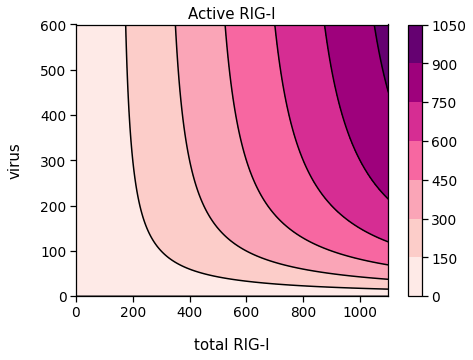

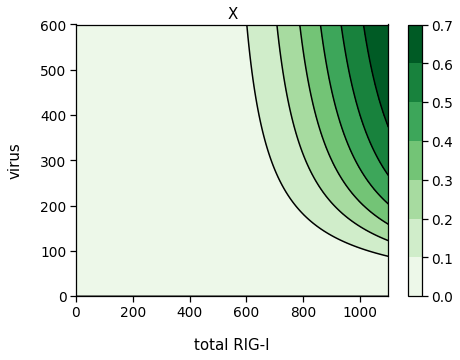

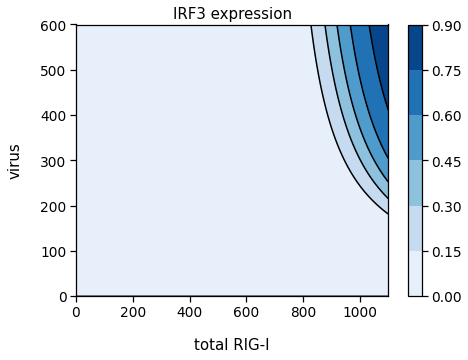

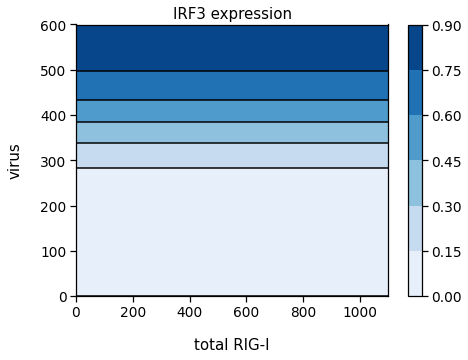

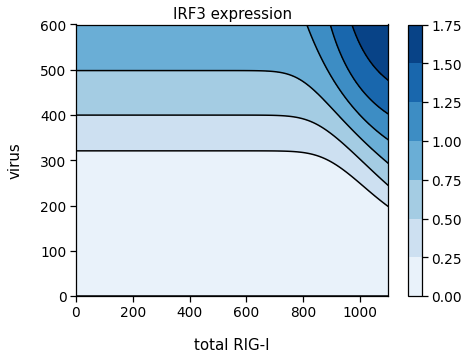

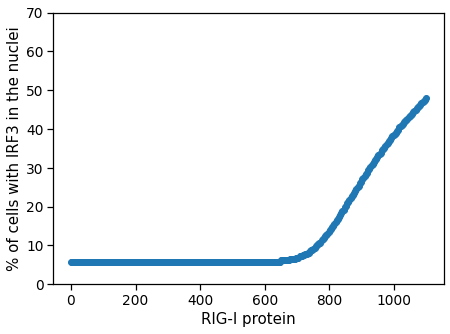

In [10]:
v = np.linspace(0,600,307) #maybe 400 instead of 600
R_tot = np.linspace(0,1100,307)
gamma = 80 
K = 0.5 
theta = 0.85
df = IRF3_percentage_test(v,R_tot, gamma, K, theta)

In [11]:
def IRF3_percentage_test_1(v,R_tot, gamma, K, theta):
    
    """Function that computes the amount of active RIG-I, IFN expression and percentage of IFN
       in the population based on an initial distribution of virus and total RIG-I protein 
       and the corresponding paramters."""
    
    # Calculating amount of active RIG-I
    V, R_TOT = np.meshgrid(v, R_tot)
    n = 1
    alpha =  1
    beta = 600
    gamma = 100
    K_X = 800
    R_active = ((R_TOT)*V)/(gamma+V)
    
    # Plotting active RIG-I
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, R_active, cmap="RdPu")
    ax.contour(CS, colors='black')

    ax.set_title('Active RIG-I')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    n = 5
    # Calculating IFN 
    alpha = 1
    n = 5
    K_I = 400 #this parameter has to be higher than gamma
    I = (alpha*(R_active**n))/(K_X**n+R_active**n) + (alpha*(V**n))/(K_I**n+V**n) #this 2nd term represents MDA5
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating % of cells expressing IFN
    fraction_of_cells = []
    for i in range(len(R_tot)):
        cells = I[i] 
        count = 0
        for element in cells:
            if element >= theta:
                count +=1
        fraction_of_cells.append((count/len(R_tot))*100)
    df = pd.DataFrame({'R_tot': list(R_tot), 'fraction_of_cells': fraction_of_cells})

    # Plotting the percentage of cells expressing IFN
    plt.figure(figsize = (7,5))
    plt.scatter(list(R_tot),fraction_of_cells)
    plt.xlabel("RIG-I protein")
    plt.ylabel("% of cells with IRF3 in the nuclei")
    plt.ylim(0,70)
    plt.show()
    return df

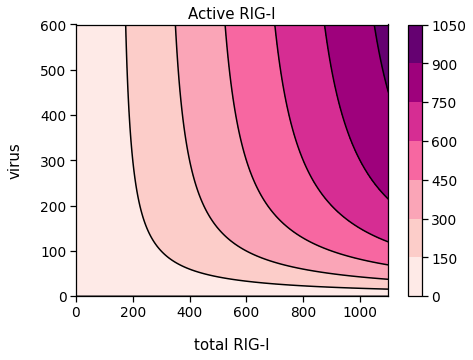

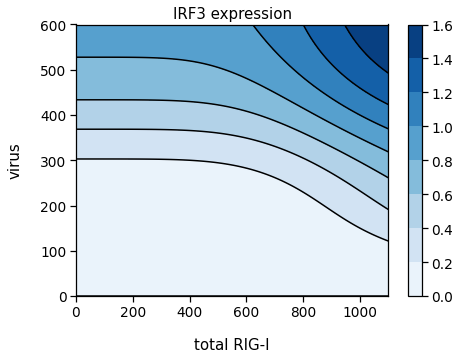

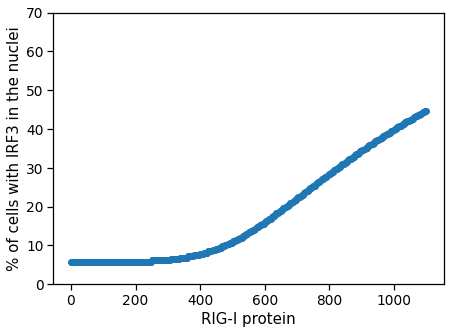

In [12]:
v = np.linspace(0,600,307) #maybe 400 instead of 600
R_tot = np.linspace(0,1100,307)
gamma = 80 
K = 0.5 
theta = 0.85
df = IRF3_percentage_test_1(v,R_tot, gamma, K, theta)

In [12]:
def IFN_percentage_test(v,R_tot, gamma, K, theta):
    
    """Function that computes the amount of active RIG-I, IFN expression and percentage of IFN
       in the population based on an initial distribution of virus and total RIG-I protein 
       and the corresponding paramters."""
    
    # Calculating amount of active RIG-I
    V, R_TOT = np.meshgrid(v, R_tot)
    n = 1
    alpha =  1
    beta = 600
    gamma = 100
    K_X = 800
    first = ((R_TOT)*V)/(gamma+V)
    #second = (((R_TOT-K_v)>0))*(V/(1+V)) + (V)#+V#+1
    R_active = ((R_TOT)*V)/(gamma+V)#first + second#((R_TOT)*V)/(gamma+V) * () #((1*V)/(gamma+V))*(1/(beta+R_tot**2)) #    
    
    
    
    # Plotting active RIG-I
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, R_active, cmap="RdPu")
    #ax.clabel(CS, inline=1, fontsize=10)
    #levels = np.arange(-1.0,1000,50)
    ax.contour(CS, colors='black')

    ax.set_title('Active RIG-I')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    n = 5
    #X = (alpha*(R_active**n))/(K_X**n+R_active**n)
    # Plotting active X
    #fig, ax = plt.subplots(figsize= (7,5))
    #CS = ax.contourf(R_TOT, V, X, cmap="Greens")
    #ax.clabel(CS, inline=1, fontsize=10)
    #levels = np.arange(-1.0,1000,50)
    #ax.contour(CS, colors='black')

    #ax.set_title('X')
    #ax.set_xlabel('total RIG-I',labelpad=18)
    #ax.set_ylabel('virus',labelpad=18)
   # plt.colorbar(CS)
    #plt.show()
    
    # Calculating IFN 
    alpha = 1
    n = 5
    K_I = 400 #this parameter has to be higher than gamma
    IRF3 = (alpha*(R_active**n))/(K_X**n+R_active**n) + (alpha*(V**n))/(K_I**n+V**n) #this 2nd term represents MDA5
    
    #Plotting IRF3
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, IRF3, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    K_IFN = 0.5
    alpha = 0.5
    I = (alpha*(IRF3**n))/(K_IFN**n+IRF3**n) #this 2nd term represents MDA5
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I, cmap="Greens")
    ax.contour(CS, colors='black')
    ax.set_title('IFN expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating % of cells expressing IFN
    fraction_of_cells = []
    for i in range(len(R_tot)):
        cells = I[i] 
        count = 0
        for element in cells:
            if element >= theta: #0.04:#0.02:
                count +=1
        #print("count",i,count, R_tot[i])
        fraction_of_cells.append((count/len(R_tot))*100)
    print(list(R_tot),fraction_of_cells)
    df = pd.DataFrame({'R_tot': list(R_tot), 'fraction_of_cells': fraction_of_cells})

    # Display the DataFrame
    print(df.head(100))
    # Plotting the percentage of cells expressing IFN
    plt.figure(figsize = (7,5))
    plt.scatter(list(R_tot),fraction_of_cells)
    plt.xlabel("RIG-I protein")
    plt.ylabel("% of cells with IRF3 in the nuclei")
    plt.ylim(0,70)
    plt.show()
    return df

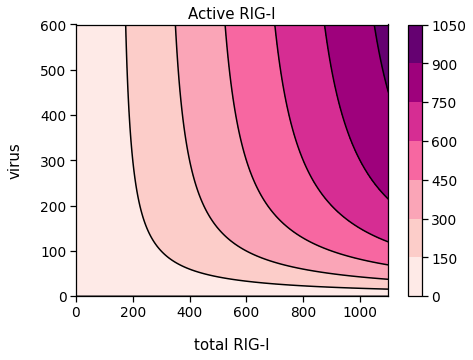

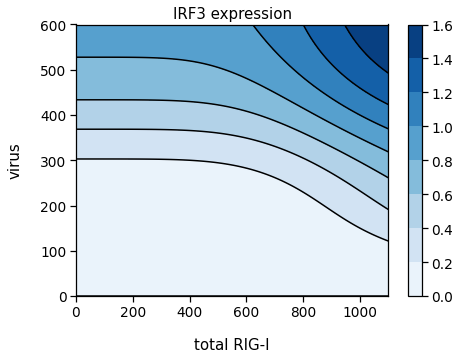

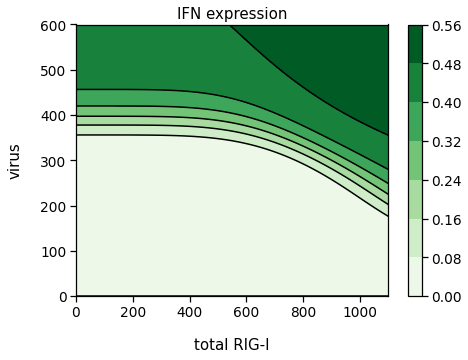

[0.0, 3.5947712418300655, 7.189542483660131, 10.784313725490197, 14.379084967320262, 17.973856209150327, 21.568627450980394, 25.163398692810457, 28.758169934640524, 32.35294117647059, 35.947712418300654, 39.54248366013072, 43.13725490196079, 46.732026143790854, 50.326797385620914, 53.92156862745098, 57.51633986928105, 61.111111111111114, 64.70588235294117, 68.30065359477125, 71.89542483660131, 75.49019607843138, 79.08496732026144, 82.6797385620915, 86.27450980392157, 89.86928104575163, 93.46405228758171, 97.05882352941177, 100.65359477124183, 104.2483660130719, 107.84313725490196, 111.43790849673204, 115.0326797385621, 118.62745098039215, 122.22222222222223, 125.81699346405229, 129.41176470588235, 133.00653594771242, 136.6013071895425, 140.19607843137254, 143.79084967320262, 147.3856209150327, 150.98039215686276, 154.5751633986928, 158.16993464052288, 161.76470588235296, 165.359477124183, 168.95424836601308, 172.54901960784315, 176.1437908496732, 179.73856209150327, 183.33333333333334,

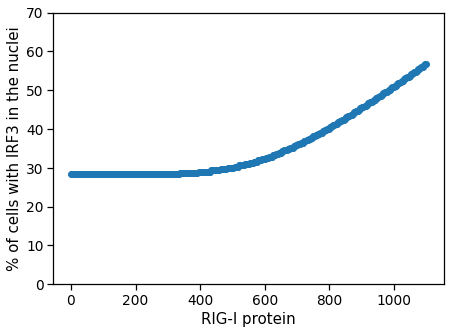

,R_tot,fraction_of_cells
0,0.000000,28.338762
1,3.594771,28.338762
2,7.189542,28.338762
3,10.784314,28.338762
4,14.379085,28.338762
...,...,...
302,1085.620915,56.026059
303,1089.215686,56.026059
304,1092.810458,56.351792
305,1096.405229,56.677524


In [14]:
v = np.linspace(0,600,307) #maybe 400 instead of 600
R_tot = np.linspace(0,1100,307)
gamma = 80 
K = 0.5 
theta = 0.35
df = IFN_percentage_test(v,R_tot, gamma, K, theta)

### 2 RUX condition

$$ v + R \;\; {\rightleftharpoons} \;\;  R_{active} \;\; \rightarrow \;\; R_{active} = kvR $$

$$ R_{active} = kvR  \;\; \rightarrow \;\; R_{active} = kv(R_{total} - R_{active})$$

$$ R_{active} = \frac{kvR_{total}}{1+ kv} $$

$$ R_{active} = \frac{vR_{total}}{\frac{1}{k} + v}; \;\; \gamma = \frac{1}{k} $$

$$ R_{active} = \frac{vR_{total}}{\gamma + v}$$

$$IRF3 = \frac{\alpha R_{active}^n}{K^n+R_{active}^n}$$

$$I = \frac{\alpha IRF3^n}{K_IRF3^n+IRF3^n}$$

In [6]:
def IFN_percentage(v,R_tot, gamma, K, K_IRF3, theta):
    
    """Function that computes the amount of active RIG-I, IFN expression and percentage of IFN
       in the population based on an initial distribution of virus and total RIG-I protein 
       and the corresponding paramters."""
    
    # Calculating amount of active RIG-I
    V, R_TOT = np.meshgrid(v, R_tot)
    R_active = (V*R_TOT)/(gamma+V)    
    
    # Plotting active RIG-I
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT, V, R_active, cmap="RdPu")
    ax.contour(CS, colors='black')
    ax.set_title('Active RIG-I')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating IRF3 
    alpha = 1
    n = 5
    IRF3 = (alpha*(R_active**n))/(K**n+R_active**n)
    kp=0.22; kd=0.45; At=1.4; K1=1.5; K2=0.15; P=108
    u1 = kp*R_active; u2=kd*P; J1=K1/At; J2=K2/At; B=u2-u1+u2*J1+u1*J2     
    IRF3 = At*2*u1*J2/(B+np.sqrt(B**2-4*(u2-u1)*u1*J2))
    # Calculating IFN
    n = 5
    I = v*(alpha*(IRF3**n))/(K_IRF3**n+IRF3**n)
    
    #Plotting IRF3
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, IRF3, cmap="Blues")
    ax.contour(CS, colors='black')
    ax.set_title('IRF3 expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    #Plotting IFN
    fig, ax = plt.subplots(figsize= (7,5))
    CS = ax.contourf(R_TOT,V, I, cmap="Purples")
    ax.contour(CS, colors='black')
    ax.set_title('IFN expression')
    ax.set_xlabel('total RIG-I',labelpad=18)
    ax.set_ylabel('virus',labelpad=18)
    plt.colorbar(CS)
    plt.show()
    
    # Calculating % of cells expressing IFN
    fraction_of_cells = []
    for i in range(len(R_tot)):
        cells = I[i] 
        count = 0
        for element in cells:
            if element >= theta: #0.04:#0.02:
                count +=1
        fraction_of_cells.append((count/len(R_tot))*100)
    
    # Plotting the percentage of cells expressing IFN
    plt.figure(figsize = (7,5))
    plt.scatter(list(R_tot),fraction_of_cells)
    plt.xlabel("RIG-I protein")
    plt.ylabel("% of cells with IFN in the nuclei")
    plt.show()

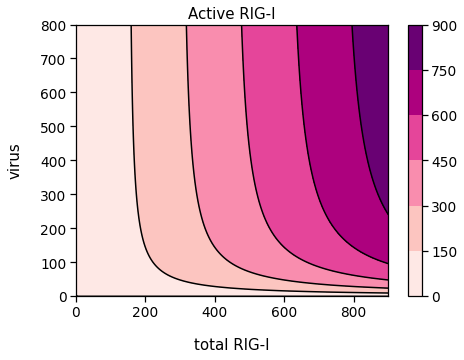

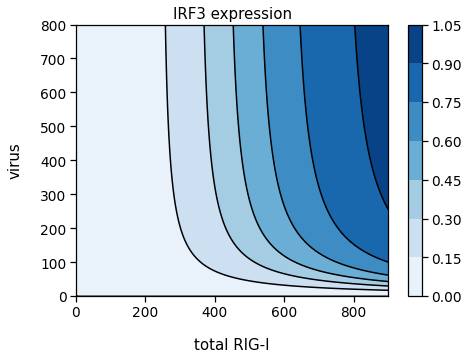

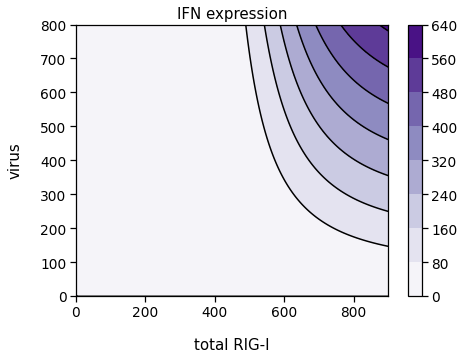

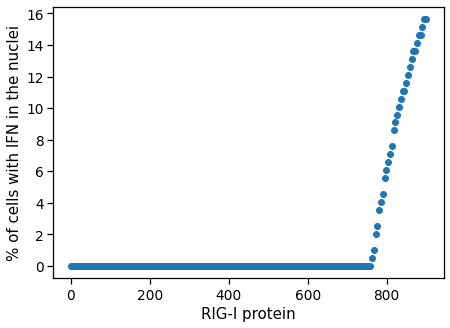

In [7]:
v = np.linspace(0,800,198) #maybe 400 instead of 600
R_tot = np.linspace(0,900,198)
gamma = 48#150#48
K = 453#453#400
K_IRF3 = 0.8
theta = 480#0.7#0.15
IFN_percentage(v,R_tot, gamma, K, K_IRF3, theta)